##**Descripción de los datos**

En la última década, el sector de la informática ha sufrido un auge en la demanda y por ende, en la remuneración, uno de los principales campos afectados ha sido el informático del "dato", incluyendo ciertos perfiles como data sciende, data engineer, data analyst, data architect, etc. Estos roles son cada vez más demandados por las empresas en un mercado dominado por la inteligencia artificial y la masiva cantidad de datos de todo tipo.

En el dataset tenemos cierta información sobre puestos informáticos relacionados con el mundo del dato, ya sea su remuneración, el país de residencia del empleado, el nivel de experiencia, el tipo de empleo, tamaño de la empresa, etc.

In [125]:
#Importamos librerías
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [126]:
#Importamos el dataset
jobs_salaries = pd.read_csv('./datasets/jobs_in_data.csv')
jobs_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


##**Objetivos**

- Estudiaremos los datos para ver como varían los salarios de EEUU dependiendo del puesto de trabajo, su categoría, experiencia y la evolución de los salarios a lo largo del tiempo.

- Estudiaremos los datos para ver como están distribuidos los roles/títulos para la categoría "Data Science and Research" en EEUU, y analizaremos el título mayoritario.


In [127]:
#Manejar datos missings
jobs_salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

In [128]:
#Tipos de datos
jobs_salaries.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
work_setting          object
company_location      object
company_size          object
job_category          object
dtype: object

In [129]:
#Información sobre los datos
jobs_salaries.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
count,14199.000000,14199,14199,14199,14199.000000,14199,14199.00000,14199,14199,14199,14199,14199
unique,NaN,4,4,149,NaN,12,NaN,86,3,74,3,10
top,NaN,Senior,Full-time,Data Engineer,NaN,USD,NaN,United States,In-person,United States,M,Data Science and Research
freq,NaN,9381,14139,3059,NaN,13146,NaN,12418,9413,12465,13112,4675
mean,2023.110501,NaN,NaN,NaN,149057.514262,NaN,149472.04944,NaN,NaN,NaN,NaN,NaN
std,0.686929,NaN,NaN,NaN,64932.044143,NaN,64379.26016,NaN,NaN,NaN,NaN,NaN
min,2020.000000,NaN,NaN,NaN,14000.000000,NaN,15000.00000,NaN,NaN,NaN,NaN,NaN
25%,2023.000000,NaN,NaN,NaN,102150.000000,NaN,104000.00000,NaN,NaN,NaN,NaN,NaN
50%,2023.000000,NaN,NaN,NaN,142000.000000,NaN,142000.00000,NaN,NaN,NaN,NaN,NaN
75%,2024.000000,NaN,NaN,NaN,185900.000000,NaN,185900.00000,NaN,NaN,NaN,NaN,NaN


In [130]:
#Información sobre job_title
print(jobs_salaries["job_title"].describe())

count             14199
unique              149
top       Data Engineer
freq               3059
Name: job_title, dtype: object


In [131]:
#Información sobre job_category
print(jobs_salaries["job_category"].describe())

count                         14199
unique                           10
top       Data Science and Research
freq                           4675
Name: job_category, dtype: object


In [133]:
print("job_category:\n ",jobs_salaries['job_category'].unique())

job_category:
  ['Data Science and Research' 'BI and Visualization'
 'Data Architecture and Modeling' 'Data Analysis' 'Data Engineering'
 'Leadership and Management' 'Data Quality and Operations'
 'Machine Learning and AI' 'Cloud and Database'
 'Data Management and Strategy']


In [132]:
#Vemos los valores únicos en nuestras variables categóricas
print("job_title:\n",jobs_salaries['job_title'].unique())

job_title:
 ['Applied Data Scientist' 'Business Intelligence' 'Data Architect'
 'Data Science' 'Insight Analyst' 'Data Engineer' 'Research Scientist'
 'Business Intelligence Analyst' 'Analytics Engineer' 'Data Scientist'
 'Research Engineer' 'BI Developer' 'Data Analyst'
 'Business Intelligence Engineer' 'Data Quality Engineer'
 'Machine Learning Engineer' 'Cloud Database Engineer' 'Head of Data'
 'BI Analyst' 'Data Manager' 'Computational Biologist'
 'Data Integration Specialist' 'Data Science Manager' 'AI Engineer'
 'Applied Scientist' 'BI Data Analyst' 'AI Research Scientist'
 'MLOps Engineer' 'Research Analyst' 'Admin & Data Analyst'
 'Business Intelligence Manager' 'Data Developer' 'Prompt Engineer'
 'Data Specialist' 'Data Integration Engineer' 'Data Science Analyst'
 'Data Analytics Associate' 'Data Reporting Analyst'
 'Business Intelligence Developer' 'Machine Learning Scientist'
 'Data Science Consultant' 'Data Management Analyst'
 'Data Operations Analyst' 'Data Management Co

In [134]:
print("salary_currency:\n ",jobs_salaries['salary_currency'].unique())

salary_currency:
  ['USD' 'GBP' 'EUR' 'CAD' 'CHF' 'NZD' 'AUD' 'PLN' 'BRL' 'TRY' 'SGD' 'DKK']


In [135]:
print("employee_residence:\n ",jobs_salaries['employee_residence'].unique())

employee_residence:
  ['United Kingdom' 'United States' 'Canada' 'Lithuania' 'Poland' 'France'
 'Germany' 'Saudi Arabia' 'India' 'Australia' 'United Arab Emirates'
 'Ukraine' 'Netherlands' 'Egypt' 'Austria' 'Spain' 'Philippines' 'Finland'
 'Türkiye' 'Switzerland' 'Oman' 'New Zealand' 'Mexico' 'Portugal'
 'Bosnia and Herzegovina' 'Brazil' 'Argentina' 'Latvia' 'South Africa'
 'Italy' 'Ireland' 'Estonia' 'Malta' 'Croatia' 'Lebanon' 'Romania'
 'Hungary' 'Viet Nam' 'Nigeria' 'Czechia' 'Pakistan' 'Uganda' 'Colombia'
 'Slovenia' 'Greece' 'Mauritius' 'Armenia' 'Thailand' 'Korea, Republic of'
 'Qatar' 'Russian Federation' 'Kenya' 'Tunisia' 'Ghana' 'Belgium'
 'Andorra' 'Ecuador' 'Peru' 'Moldova, Republic of' 'Uzbekistan' 'Georgia'
 'Central African Republic' 'Singapore' 'Sweden' 'Kuwait' 'Cyprus'
 'Iran, Islamic Republic of' 'American Samoa' 'China' 'Costa Rica' 'Chile'
 'Puerto Rico' 'Denmark' 'Bolivia, Plurinational State of'
 'Dominican Republic' 'Indonesia' 'Malaysia' 'Japan' 'Honduras' 'Alg

In [136]:
print("experience_level:\n ",jobs_salaries['experience_level'].unique())

experience_level:
  ['Entry-level' 'Executive' 'Senior' 'Mid-level']


In [138]:
print("employment_type:\n ",jobs_salaries['employment_type'].unique())

employment_type:
  ['Freelance' 'Full-time' 'Contract' 'Part-time']


In [139]:
print("work_setting:\n ",jobs_salaries['work_setting'].unique())

work_setting:
  ['Remote' 'In-person' 'Hybrid']


In [140]:
print("company_location:\n ",jobs_salaries['company_location'].unique())

company_location:
  ['United Kingdom' 'United States' 'Canada' 'Lithuania' 'Poland' 'France'
 'Germany' 'Saudi Arabia' 'Australia' 'United Arab Emirates' 'Ukraine'
 'Netherlands' 'Egypt' 'Austria' 'Spain' 'Philippines' 'Finland' 'Türkiye'
 'Switzerland' 'Oman' 'New Zealand' 'Mexico' 'Portugal'
 'Bosnia and Herzegovina' 'Brazil' 'Argentina' 'Latvia' 'South Africa'
 'Italy' 'American Samoa' 'Ireland' 'Estonia' 'India' 'Malta' 'Hungary'
 'Lebanon' 'Romania' 'Viet Nam' 'Nigeria' 'Luxembourg' 'Gibraltar'
 'Colombia' 'Slovenia' 'Greece' 'Mauritius' 'Russian Federation'
 'Korea, Republic of' 'Czechia' 'Qatar' 'Kenya' 'Denmark' 'Ghana' 'Sweden'
 'Andorra' 'Ecuador' 'Israel' 'Japan' 'Central African Republic'
 'Singapore' 'Croatia' 'Armenia' 'Pakistan' 'Iran, Islamic Republic of'
 'Bahamas' 'Puerto Rico' 'Thailand' 'Belgium' 'Indonesia' 'Malaysia'
 'Honduras' 'Algeria' 'Iraq' 'China' 'Moldova, Republic of']


In [141]:
print("company_size:\n ",jobs_salaries['company_size'].unique())

company_size:
  ['M' 'S' 'L']


In [142]:
#Mostramos el número de datos de cada país
print(f'Numero de filas por pais de empleado')

for company in jobs_salaries['employee_residence'].unique():

  count=jobs_salaries[jobs_salaries['employee_residence']==company]
  print(f'-------"{company}": {count.shape[0]}')

Numero de filas por pais de empleado
-------"United Kingdom": 616
-------"United States": 12418
-------"Canada": 371
-------"Lithuania": 16
-------"Poland": 15
-------"France": 63
-------"Germany": 90
-------"Saudi Arabia": 3
-------"India": 22
-------"Australia": 48
-------"United Arab Emirates": 4
-------"Ukraine": 11
-------"Netherlands": 28
-------"Egypt": 14
-------"Austria": 10
-------"Spain": 131
-------"Philippines": 8
-------"Finland": 3
-------"Türkiye": 8
-------"Switzerland": 6
-------"Oman": 1
-------"New Zealand": 6
-------"Mexico": 12
-------"Portugal": 30
-------"Bosnia and Herzegovina": 2
-------"Brazil": 21
-------"Argentina": 11
-------"Latvia": 14
-------"South Africa": 14
-------"Italy": 21
-------"Ireland": 12
-------"Estonia": 11
-------"Malta": 3
-------"Croatia": 5
-------"Lebanon": 2
-------"Romania": 5
-------"Hungary": 1
-------"Viet Nam": 6
-------"Nigeria": 12
-------"Czechia": 2
-------"Pakistan": 6
-------"Uganda": 1
-------"Colombia": 16
-------"Sloveni

Nos encontramos el problema de la falta de registros para algunos países, lo que puede conducir a sesgo. Como solución nos quedamos solo con los datos de EEUU para el análisis.

In [143]:
jobs_salaries=jobs_salaries[jobs_salaries['employee_residence']=='United States']
jobs_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
7,2024,Entry-level,Full-time,Insight Analyst,50000,USD,50000,United States,Remote,United States,M,Data Analysis
8,2024,Entry-level,Full-time,Insight Analyst,40000,USD,40000,United States,Remote,United States,M,Data Analysis
9,2024,Senior,Full-time,Data Engineer,276000,USD,276000,United States,In-person,United States,M,Data Engineering
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


##**Estudio de los salarios en EEUU**

*   **Salario/Categoria**

In [145]:
#Salario medio por categoría
jobs_salaries.groupby('job_category')['salary_in_usd'].mean()

job_category
BI and Visualization              132038.848030
Cloud and Database                142818.181818
Data Analysis                     111940.028963
Data Architecture and Modeling    160888.350133
Data Engineering                  153547.920732
Data Management and Strategy       96032.092784
Data Quality and Operations       102064.924242
Data Science and Research         170613.493729
Leadership and Management         145900.086131
Machine Learning and AI           193066.901982
Name: salary_in_usd, dtype: float64

La categoria "Data Management and Strategy" presenta un mayor salario medio que los demás, y la categoría "Machine Learning and AI" presenta un salario medio menor que los demás.

In [146]:
#Salario máximo por categoría
jobs_salaries.groupby('job_category')['salary_in_usd'].max()

job_category
BI and Visualization              263000
Cloud and Database                190000
Data Analysis                     385000
Data Architecture and Modeling    381500
Data Engineering                  385000
Data Management and Strategy      250000
Data Quality and Operations       289120
Data Science and Research         450000
Leadership and Management         405000
Machine Learning and AI           448000
Name: salary_in_usd, dtype: int64

In [147]:
#Salario mínimo por categoría
jobs_salaries.groupby('job_category')['salary_in_usd'].min()

job_category
BI and Visualization              44100
Cloud and Database                82000
Data Analysis                     34320
Data Architecture and Modeling    52500
Data Engineering                  24000
Data Management and Strategy      44000
Data Quality and Operations       25000
Data Science and Research         24000
Leadership and Management         38000
Machine Learning and AI           25500
Name: salary_in_usd, dtype: int64

Curiosamente vemos que "Coud and Database" presenta el valor máximo mas bajo y el mínimo más alto, lo que puede resultar contraproducente.

En cambio, "Machine Learning and AI" presenta el valor máximo mas alto y uno mínimos más bajos.

In [148]:
print("Numero de filas por categoria:")

for category in jobs_salaries['job_category'].unique():

  count=jobs_salaries[jobs_salaries['job_category']==category]
  print(f'-------"{category}": {count.shape[0]}')

Numero de filas por categoria:
-------"BI and Visualization": 533
-------"Data Analysis": 1899
-------"Data Engineering": 2788
-------"Data Science and Research": 4146
-------"Leadership and Management": 685
-------"Data Quality and Operations": 66
-------"Machine Learning and AI": 1816
-------"Cloud and Database": 11
-------"Data Architecture and Modeling": 377
-------"Data Management and Strategy": 97


In [149]:
jobs_salaries[jobs_salaries['job_category']=="Cloud and Database"]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
47,2024,Mid-level,Full-time,Cloud Database Engineer,146125,USD,146125,United States,Remote,United States,M,Cloud and Database
48,2024,Mid-level,Full-time,Cloud Database Engineer,82000,USD,82000,United States,Remote,United States,M,Cloud and Database
268,2024,Mid-level,Full-time,Cloud Database Engineer,189000,USD,189000,United States,In-person,United States,M,Cloud and Database
269,2024,Mid-level,Full-time,Cloud Database Engineer,106000,USD,106000,United States,In-person,United States,M,Cloud and Database
333,2024,Senior,Full-time,Cloud Database Engineer,170375,USD,170375,United States,Remote,United States,M,Cloud and Database
334,2024,Senior,Full-time,Cloud Database Engineer,102500,USD,102500,United States,Remote,United States,M,Cloud and Database
11199,2023,Senior,Full-time,Cloud Database Engineer,170000,USD,170000,United States,Remote,United States,L,Cloud and Database
12197,2023,Senior,Full-time,Cloud Database Engineer,140000,USD,140000,United States,Remote,United States,M,Cloud and Database
12198,2023,Senior,Full-time,Cloud Database Engineer,115000,USD,115000,United States,Remote,United States,M,Cloud and Database
12409,2022,Senior,Full-time,Cloud Database Engineer,190000,USD,190000,United States,Remote,United States,M,Cloud and Database


Vemos que la categoría que menos datos presenta en "Cloud and Database" con la excasa cantidad de 11 registros, y todos tienen experiencia "Senior" o "Mid-level", lo cuál explica los datos del mínimo y el máximo de esta categoría.

In [150]:
# Media por año y categoría
category_year = jobs_salaries[['work_year', 'job_category', 'salary_in_usd']].groupby(['work_year', 'job_category']).mean()
category_year

salary_in_usd
work_year job_category                                 
2020      Data Analysis                    95375.000000
          Data Engineering                118500.000000
          Data Science and Research       209273.076923
          Machine Learning and AI         179333.333333
2021      Data Analysis                   101562.500000
          Data Architecture and Modeling  187500.000000
          Data Engineering                146701.136364
          Data Management and Strategy    165000.000000
          Data Science and Research       147553.571429
          Leadership and Management       145000.000000
          Machine Learning and AI         196923.076923
2022      BI and Visualization            116500.000000
          Cloud and Database              175000.000000
          Data Analysis                   115260.908333
          Data Architecture and Modeling  167207.068182
          Data Engineering                151116.187050
          Data Management and Strategy    119500.000000
          Data Quality and Operations      84770.833333
          Data Science and Research       159961.108108
          Leadership and Management       148624.461538
          Machine Learning and AI         166018.048387
2023      BI and Visualization            137838.237389
          Cloud and Database              141666.666667
          Data Analysis                   112426.768412
          Data Architecture and Modeling  157509.411255
          Data Engineering                154756.497062
          Data Management and Strategy     94811.907407
          Data Quality and Operations     110532.631579
          Data Science and Research       174074.667600
          Leadership and Management       147579.433824
          Machine Learning and AI         194294.203404
2024      BI and Visualization            122183.437500
          Cloud and Database              132666.666667
          Data Analysis                   109878.994094
          Data Architecture and Modeling  164929.826531
          Data Engineering                152378.180404
          Data Management and Strategy     88602.187500
          Data Quality and Operations      94924.687500
          Data Science and Research       167129.094324
          Leadership and Management       141756.328502
          Machine Learning and AI         196865.403194

In [151]:
#Creo una pivot table con las categorías y el año
pivot_category_year = category_year.unstack()
pivot_category_year

salary_in_usd                                    \
job_category BI and Visualization Cloud and Database  Data Analysis   
work_year                                                             
2020                          NaN                NaN   95375.000000   
2021                          NaN                NaN  101562.500000   
2022                116500.000000      175000.000000  115260.908333   
2023                137838.237389      141666.666667  112426.768412   
2024                122183.437500      132666.666667  109878.994094   

                                                              \
job_category Data Architecture and Modeling Data Engineering   
work_year                                                      
2020                                    NaN    118500.000000   
2021                          187500.000000    146701.136364   
2022                          167207.068182    151116.187050   
2023                          157509.411255    154756.497062   
2024                          164929.826531    152378.180404   

                                                                       \
job_category Data Management and Strategy Data Quality and Operations   
work_year                                                               
2020                                  NaN                         NaN   
2021                        165000.000000                         NaN   
2022                        119500.000000                84770.833333   
2023                         94811.907407               110532.631579   
2024                         88602.187500                94924.687500   

                                                                  \
job_category Data Science and Research Leadership and Management   
work_year                                                          
2020                     209273.076923                       NaN   
2021                     147553.571429             145000.000000   
2022                     159961.108108             148624.461538   
2023                     174074.667600             147579.433824   
2024                     167129.094324             141756.328502   

                                      
job_category Machine Learning and AI  
work_year                             
2020                   179333.333333  
2021                   196923.076923  
2022                   166018.048387  
2023                   194294.203404  
2024                   196865.403194

In [152]:
# Elimino un nivel en las columnas
pivot_category_year.columns = pivot_category_year.columns.droplevel()
pivot_category_year

job_category,BI and Visualization,Cloud and Database,Data Analysis,Data Architecture and Modeling,Data Engineering,Data Management and Strategy,Data Quality and Operations,Data Science and Research,Leadership and Management,Machine Learning and AI
work_year,,,,,,,,,,
2020,NaN,NaN,95375.000000,NaN,118500.000000,NaN,NaN,209273.076923,NaN,179333.333333
2021,NaN,NaN,101562.500000,187500.000000,146701.136364,165000.000000,NaN,147553.571429,145000.000000,196923.076923
2022,116500.000000,175000.000000,115260.908333,167207.068182,151116.187050,119500.000000,84770.833333,159961.108108,148624.461538,166018.048387
2023,137838.237389,141666.666667,112426.768412,157509.411255,154756.497062,94811.907407,110532.631579,174074.667600,147579.433824,194294.203404
2024,122183.437500,132666.666667,109878.994094,164929.826531,152378.180404,88602.187500,94924.687500,167129.094324,141756.328502,196865.403194


In [153]:
# Eliminar columnas con valores nulos
pivot_sin_nulos = pivot_category_year.dropna(axis=1)

# Imprimir el DataFrame resultante
pivot_sin_nulos

job_category,Data Analysis,Data Engineering,Data Science and Research,Machine Learning and AI
work_year,,,,
2020,95375.000000,118500.000000,209273.076923,179333.333333
2021,101562.500000,146701.136364,147553.571429,196923.076923
2022,115260.908333,151116.187050,159961.108108,166018.048387
2023,112426.768412,154756.497062,174074.667600,194294.203404
2024,109878.994094,152378.180404,167129.094324,196865.403194


Hemos eliminado aquellas categorias que no presenten datos para todos los años con el propósito de evitar ruido y distracciones en la gráfica.

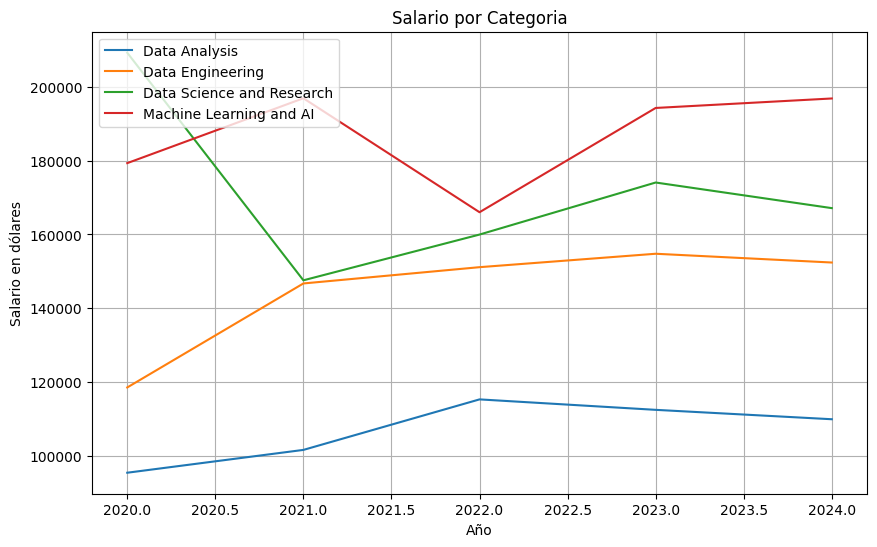

In [155]:
# Representación de los salarios por categorías a lo largo del tiempo
pivot_sin_nulos.plot(kind='line', figsize=(10, 6))
plt.title('Salario por Categoria')
plt.xlabel('Año')
plt.ylabel('Salario en dólares')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

En el gráfico de lineas observamos la evolución de los salarios
* La linea roja, que representa el campo del Machine Learning y la IA, tiene un comportamiento escalonado, vemos una subida en el primer año, en el segundo año tenemos una bajada, y en el último año tenemos otra subida que se estabiliza hasta 2024, vemos que presenta un salario medio mayor que las demás.

* La linea verde "Data Science and Research" presenta una gran baja entre 2020 y 2021, y luego presenta una gran subida hasta 2023 para finalmente bajar ligeramente en 2024, por lo general presenta un salario medio alto.

* Tanto la línea azul "Data Analysis" como la linea naranja "Data Engineering" presentan una subida a lo largo de los ultimos años. El campo del "Data Analysis" presenta un salario medio menor respecto a los demás.

*   **Salario/Experiencia**

In [156]:
#Salario medio por nivel de experiencia
jobs_salaries.groupby('experience_level')['salary_in_usd'].mean()

experience_level
Entry-level    103743.667925
Executive      198567.878788
Mid-level      133749.614016
Senior         167225.886138
Name: salary_in_usd, dtype: float64

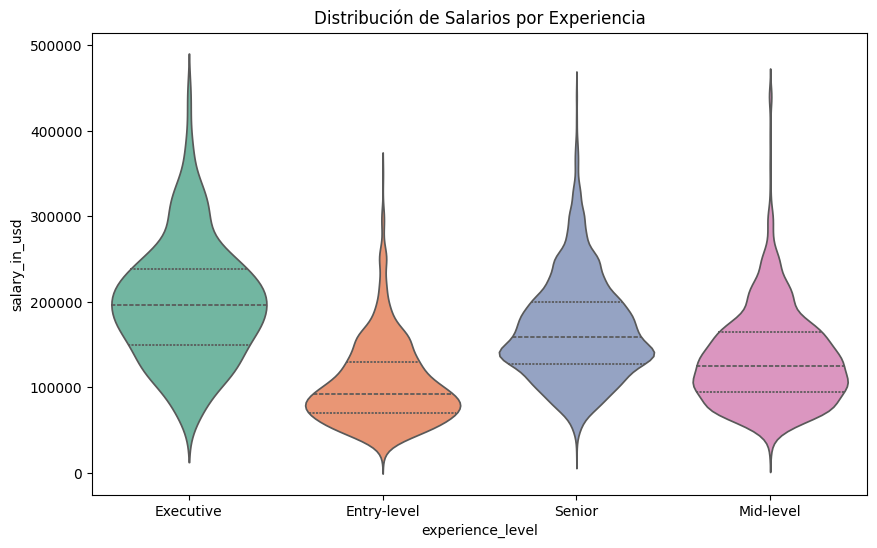

In [157]:
# Crear un gráfico de violín para visualizar la distribución de salarios por experiencia
plt.figure(figsize=(10, 6))
sns.violinplot(x='experience_level', y='salary_in_usd', data=jobs_salaries, inner='quartile', hue='experience_level', palette='Set2')
plt.title('Distribución de Salarios por Experiencia')
plt.show()

Como era de esperar, la mediana de los salarios de los empleado asciende respecto a la experiencia del trabajador, sin embargo, también hay una gran variación en los salarios dentro de cada nivel de experiencia. Por ejemplo, hay algunas personas con nivel de experiencia "Senior" que ganan menos dinero que algunas personas con nivel de experiencia "Mid-level".

Tambien vemos como experiencia nivel "Medio" curiosamente presenta un tope igual o mayor a "Senior", a continuación vamos a analizar por qué ocurre esto,

[Text(0.5, 1.0, 'Salario por Nivel de Experiencia')]

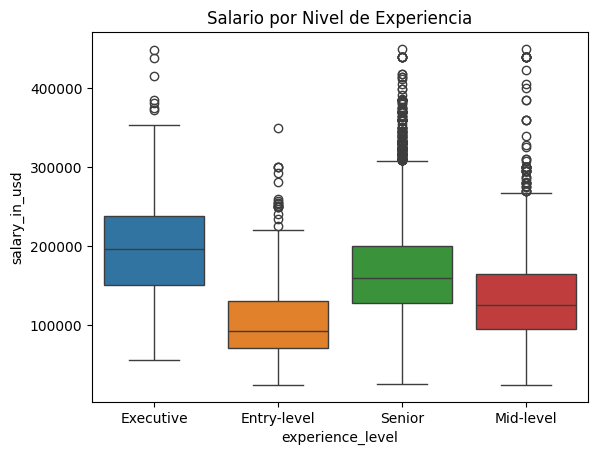

In [158]:
# Grafico de Cajas para visualizar la distribución de salarios por experiencia
sns.boxplot(
    jobs_salaries,
    x='experience_level',
    y='salary_in_usd',
    hue= "experience_level"
).set(title='Salario por Nivel de Experiencia')

Podemos ver que el nivel de experiencia "Senior" y "Medio" presenta una gran cantidad de valores anómalos, y son bastante altos respecto al nivel de la caja.

*   **Salario/Presencialidad**

In [159]:
#Salario medio respecto al tipo de trabajo
jobs_salaries.groupby('work_setting')['salary_in_usd'].mean()

work_setting
Hybrid       138129.545455
In-person    158619.844045
Remote       153094.186189
Name: salary_in_usd, dtype: float64

In [160]:
# Agrupo por año y experiencia
work_setting_year = jobs_salaries[['work_year', 'work_setting', 'salary_in_usd']].groupby(['work_year', 'work_setting']).mean()
work_setting_year

salary_in_usd
work_year work_setting               
2020      Hybrid        171000.000000
          In-person     214333.333333
          Remote        150883.333333
2021      Hybrid        154833.333333
          In-person     145395.000000
          Remote        147500.000000
2022      Hybrid        125466.666667
          In-person     145618.479933
          Remote        150916.540730
2023      Hybrid        118427.272727
          In-person     161256.656096
          Remote        154872.186684
2024      Hybrid        175500.000000
          In-person     156265.310999
          Remote        150472.283966

In [161]:
#Creo mi pivot table
pivot_setting_year = work_setting_year.unstack()
pivot_setting_year

salary_in_usd                              
work_setting         Hybrid      In-person         Remote
work_year                                                
2020          171000.000000  214333.333333  150883.333333
2021          154833.333333  145395.000000  147500.000000
2022          125466.666667  145618.479933  150916.540730
2023          118427.272727  161256.656096  154872.186684
2024          175500.000000  156265.310999  150472.283966

In [162]:
#Elimino un nivel en las columnas
pivot_setting_year.columns = pivot_setting_year.columns.droplevel()
pivot_setting_year

work_setting,Hybrid,In-person,Remote
work_year,,,
2020,171000.000000,214333.333333,150883.333333
2021,154833.333333,145395.000000,147500.000000
2022,125466.666667,145618.479933,150916.540730
2023,118427.272727,161256.656096,154872.186684
2024,175500.000000,156265.310999,150472.283966


<Axes: xlabel='work_year'>

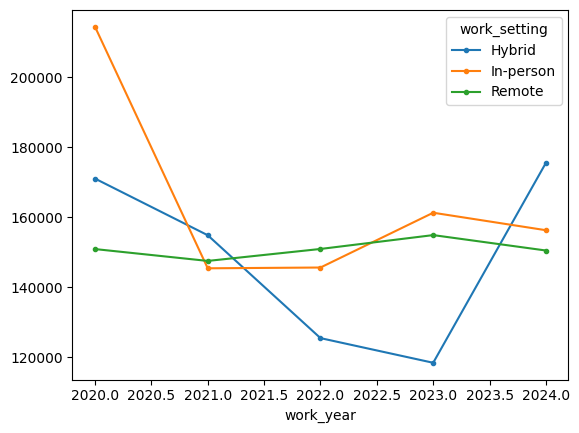

In [163]:
#Grafico multilinea del salario con diferentes modalidades de presencialiadad
pivot_setting_year.plot.line(
    style='.-'
)

In [164]:
print("Numero de filas por tipo de presencialidad:")

for category in jobs_salaries['work_setting'].unique():

  count=jobs_salaries[jobs_salaries['work_setting']==category]
  print(f'-------"{category}": {count.shape[0]}')

Numero de filas por tipo de presencialidad:
-------"In-person": 8464
-------"Remote": 3910
-------"Hybrid": 44


Podemos ver que los trabajadores con nivel de presencialidad "Híbrida" presentaban peores condiciones salariales que el resto hasta 2024, este último año ido decreciendo el salario medio de los empleos, pero estos datos seguramente no representen a toda la población de trabajos híbridos, ya que solo contamos con 44 registros.

Los empleados con trabajo remoto y presencial han visto ligeramente mejoradas sus condiciones salariales en los últimos años.

Curiosamente, entre 2020 y 2021 se produce un descenso del salario medio para todas las modalidades de empleo.

In [165]:
jobs_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
7,2024,Entry-level,Full-time,Insight Analyst,50000,USD,50000,United States,Remote,United States,M,Data Analysis
8,2024,Entry-level,Full-time,Insight Analyst,40000,USD,40000,United States,Remote,United States,M,Data Analysis
9,2024,Senior,Full-time,Data Engineer,276000,USD,276000,United States,In-person,United States,M,Data Engineering
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


*   **Salario/Compañia**

In [166]:
#Grafico de Pie o Tarta
fig = px.pie(
    jobs_salaries,
    names='company_size',
    values=jobs_salaries.index,
    title='Proporción del tamaño de las empresas de EEUU',
    hole=0.5
)
fig.show()

Vemos que el 92,4% de las empresas de EEUU son medianas, el 6,9% son grandes, y el 0,72% restante es para las empresas pequeñas.

In [167]:
#Salario medio/compañía
jobs_company=jobs_salaries[['company_size', 'salary_in_usd']].groupby(['company_size']).mean()
jobs_company

,salary_in_usd
company_size,
L,165516.778736
M,156429.488432
S,125048.461538


[Text(0.5, 1.0, 'Salario medio en EEUU por tamaño de la empresa'),
 Text(0.5, 0, 'Tamaño Empresa'),
 Text(0, 0.5, 'Salario Medio')]

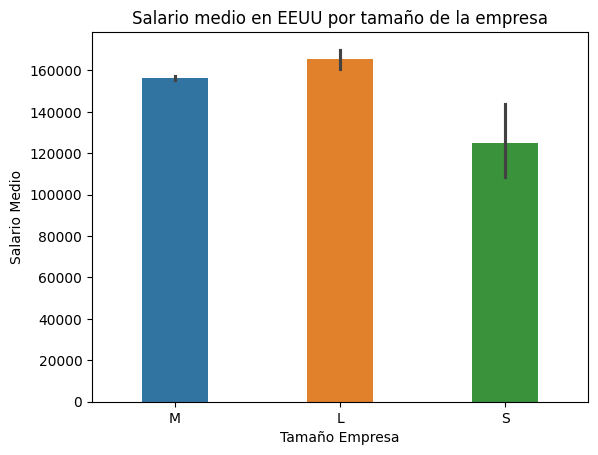

In [168]:
#Mostramos como varían los sueldos en EEUU según la empresa
sns.barplot(
    jobs_salaries,
    x='company_size',
    y='salary_in_usd',
    width=0.4,
    hue = "company_size",
    legend = False
).set(title='Salario medio en EEUU por tamaño de la empresa',xlabel='Tamaño Empresa', ylabel='Salario Medio')

Podemos ver que otra condicion que favorece al salario de los empleados en EEUU es el tamaño de la empresa, cuánto mayor es la empresa, mayor es el salario medio.

###**Conclusiones**

Al haber realizado el estudio de la variación de los salarios respecto a diferentes condiciones podemos concluir que en EEUU los salarios se ven afectados por varios factores, entonces podemos concluir con que:

* Los salarios más altos se presentan en las empresas grandes, de forma presencial, con un nivel de experiencia ejecutivo y en la categoría del Machine Learning e IA

* Los salarios más bajos se presentan en empresas pequeñas, de presencialidad híbrida, con un nivel de experiencia junior/aprendiz y en la categoría Data Analysis

##**Estudio del titulos de empleo dentro de 'Data Science and Research'**

In [169]:
jobs_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
7,2024,Entry-level,Full-time,Insight Analyst,50000,USD,50000,United States,Remote,United States,M,Data Analysis
8,2024,Entry-level,Full-time,Insight Analyst,40000,USD,40000,United States,Remote,United States,M,Data Analysis
9,2024,Senior,Full-time,Data Engineer,276000,USD,276000,United States,In-person,United States,M,Data Engineering
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


In [170]:
jobs_science=jobs_salaries[jobs_salaries['job_category']=='Data Science and Research']
jobs_science

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
11,2024,Senior,Full-time,Research Scientist,234000,USD,234000,United States,In-person,United States,M,Data Science and Research
12,2024,Senior,Full-time,Research Scientist,146000,USD,146000,United States,In-person,United States,M,Data Science and Research
19,2024,Senior,Full-time,Data Scientist,322000,USD,322000,United States,In-person,United States,M,Data Science and Research
20,2024,Senior,Full-time,Data Scientist,168000,USD,168000,United States,In-person,United States,M,Data Science and Research
23,2024,Senior,Full-time,Research Engineer,138000,USD,138000,United States,In-person,United States,M,Data Science and Research
...,...,...,...,...,...,...,...,...,...,...,...,...
14186,2020,Mid-level,Full-time,Data Scientist,118000,USD,118000,United States,Remote,United States,M,Data Science and Research
14187,2020,Mid-level,Full-time,Data Scientist,138350,USD,138350,United States,Remote,United States,M,Data Science and Research
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research


* Distribución de los diferentes títulos de empleo

In [171]:
#Mostramos los titulos de la categoria
print(f'Numero de filas por titulo de empleado')

for title in jobs_science['job_title'].unique():

  count=jobs_science[jobs_science['job_title']==title]
  print(f'-------"{title}": {count.shape[0]}')

Numero de filas por titulo de empleado
-------"Research Scientist": 426
-------"Data Scientist": 2538
-------"Research Engineer": 238
-------"Data Science": 172
-------"Computational Biologist": 2
-------"Data Science Manager": 103
-------"Research Analyst": 93
-------"Data Science Analyst": 2
-------"Applied Scientist": 365
-------"Data Science Consultant": 61
-------"Quantitative Research Analyst": 1
-------"AI Research Engineer": 1
-------"Data Science Engineer": 16
-------"Data Science Practitioner": 14
-------"Data Science Director": 6
-------"Data Science Lead": 24
-------"Director of Data Science": 22
-------"Managing Director Data Science": 2
-------"Marketing Data Scientist": 1
-------"Decision Scientist": 36
-------"Principal Data Scientist": 6
-------"Staff Data Scientist": 2
-------"Head of Data Science": 7
-------"Lead Data Scientist": 3
-------"Data Science Tech Lead": 1
-------"Data Scientist Lead": 1
-------"Applied Data Scientist": 3


In [172]:
# Creamos un DataFrame con los porcentajes de cada título
column_names = ['job_title', 'percent']
jobs_science_percent = pd.DataFrame(columns=column_names)

# Calculamos el total de títulos
total_titles = len(jobs_science)

for title in jobs_science['job_title'].unique():
    # Calculamos el porcentaje de cada título
    percent = (jobs_science['job_title'] == title).mean() * 100

    # Si el porcentaje es menor al 2.5%, lo agrupamos como "Otros"
    if percent < 2.5:
        jobs_science_percent.loc[len(jobs_science_percent)] = ['Otros', percent]
    else:
        jobs_science_percent.loc[len(jobs_science_percent)] = [title, percent]

print(jobs_science_percent)

             job_title    percent
0   Research Scientist  10.274964
1       Data Scientist  61.215630
2    Research Engineer   5.740473
3         Data Science   4.148577
4                Otros   0.048239
5                Otros   2.484322
6                Otros   2.243126
7                Otros   0.048239
8    Applied Scientist   8.803666
9                Otros   1.471298
10               Otros   0.024120
11               Otros   0.024120
12               Otros   0.385914
13               Otros   0.337675
14               Otros   0.144718
15               Otros   0.578871
16               Otros   0.530632
17               Otros   0.048239
18               Otros   0.024120
19               Otros   0.868307
20               Otros   0.144718
21               Otros   0.048239
22               Otros   0.168837
23               Otros   0.072359
24               Otros   0.024120
25               Otros   0.024120
26               Otros   0.072359


In [173]:
#Proporción de los títulos en Data Science and Research
fig = px.pie(
    jobs_science_percent,
    names='job_title',
    values='percent',
    title='Proporción de los títulos en Data Science and Research',
    hole=0.5
)
fig.show()

Según el gráfico de tartas, el título de la mayoría de trabajadores de 'Data Science and Research' es el de 'Data Scientist' con un 61,2%, seguido de 'Research Scientist' y de 'Applied Scientist' con un 10,3% y 8.8% respectivamente.

* Estudio del título mayoritario en los Data Scientist

In [174]:
jobs_data_scientist=jobs_science[jobs_science['job_title']=='Data Scientist']
jobs_data_scientist

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
19,2024,Senior,Full-time,Data Scientist,322000,USD,322000,United States,In-person,United States,M,Data Science and Research
20,2024,Senior,Full-time,Data Scientist,168000,USD,168000,United States,In-person,United States,M,Data Science and Research
37,2024,Senior,Full-time,Data Scientist,297000,USD,297000,United States,In-person,United States,M,Data Science and Research
38,2024,Senior,Full-time,Data Scientist,138000,USD,138000,United States,In-person,United States,M,Data Science and Research
55,2024,Senior,Full-time,Data Scientist,190000,USD,190000,United States,Remote,United States,M,Data Science and Research
...,...,...,...,...,...,...,...,...,...,...,...,...
14183,2021,Mid-level,Full-time,Data Scientist,73000,USD,73000,United States,In-person,United States,L,Data Science and Research
14186,2020,Mid-level,Full-time,Data Scientist,118000,USD,118000,United States,Remote,United States,M,Data Science and Research
14187,2020,Mid-level,Full-time,Data Scientist,138350,USD,138350,United States,Remote,United States,M,Data Science and Research
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research


In [175]:
# Salario medio por año
jobs_data_scientist_year = jobs_data_scientist[['work_year', 'salary_in_usd']].groupby(['work_year']).mean()
jobs_data_scientist_year

,salary_in_usd
work_year,
2020,166391.666667
2021,112966.666667
2022,152814.456193
2023,169326.452381
2024,153149.424332


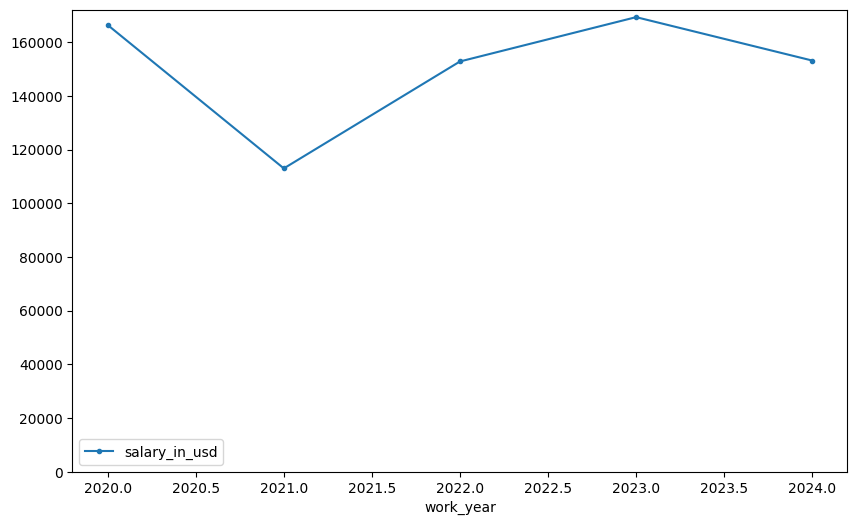

In [176]:
# Crear el gráfico de líneas
ax = jobs_data_scientist_year.plot.line(style='.-', figsize=(10, 6))

# Establecer el límite inferior del eje y en 0
ax.set_ylim(bottom=0)

plt.show()

Podemos ver como para los cientificos de datos, sufrieron una bajada de los salarios en 2021, pero hasta 2023 han ido incrementando el salario medio de los trabajadores. En 2024 ha bajado ligeramente el salario medio de los puestos de trabajo para "Data Scientist"

In [177]:
#Mostramos los titulos de la categoria
print(f'Numero de filas de Data Science and Research en empresas')

for title in jobs_science['company_size'].unique():

  count=jobs_science[jobs_science['company_size']==title]
  print(f'-------"{title}": {count.shape[0]}')

Numero de filas de Data Science and Research en empresas
-------"M": 3763
-------"L": 368
-------"S": 15


In [178]:
#Proporción de las empresas en Data Science
fig = px.pie(
    jobs_science,
    names='company_size',
    title='Proporción de los títulos en Data Science and Research en empresas',
    hole=0.5
)
fig.show()

Vemos que el perfil de Data Science se encuentra ubicado en un 90,8% en empresas medianas, un 8,88% en empresas grandes y un 0,36% en empresas pequeñas.

In [179]:
#Sacamos el conteo del tipo de presencialidad
jobs_science_bar=jobs_science.groupby('work_setting')['work_setting'].count()
jobs_science_bar

work_setting
Hybrid         17
In-person    2897
Remote       1232
Name: work_setting, dtype: int64

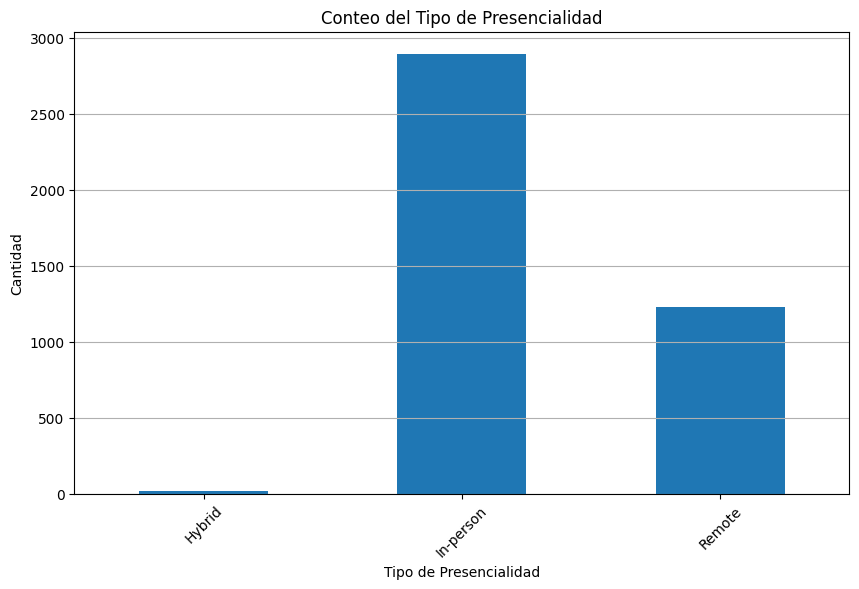

In [180]:
#Representamos el conteo de la presencialidad
jobs_science_bar.plot(kind='bar', figsize=(10, 6))
plt.title('Conteo del Tipo de Presencialidad')
plt.xlabel('Tipo de Presencialidad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Vemos como la gran mayoría de trabajadores van de forma presencial con un conteo de casi 3000 registros, le sigue el formato remoto con 1200 registros, y por último el formato híbrido con poco más de 15 registros.

###Conclusiones

El título que predomina en Data Science and Research es 'Data Science' con un 61,2%, este título ha aumentado su salario medio en 30.000$ los últimos 3 años, además la mayoría de trabajos tienen un formato presencial, más del doble de usuarios respecto a los usuarios remotos y se encuentran ubicados en empresas de tamaño mediano con un 91%.

Por lo visto en los datos, las empresas pequeñas ofrecen pocos puestos para este título, además, las empresas no apuestan por un formato de presencialidad híbirdo.

